In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-retirement/Bank_Customer_retirement.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

**import dataset **

In [3]:
bank_df = pd.read_csv("../input/bank-customer-retirement/Bank_Customer_retirement.csv")
bank_df

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [4]:
bank_df.keys()


Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

**Visualize the data **

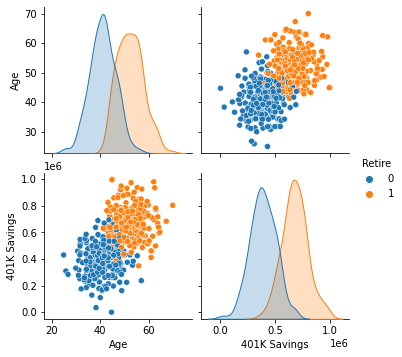

In [5]:
sns.pairplot(bank_df, hue= 'Retire' , vars =['Age','401K Savings'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Retire', ylabel='count'>

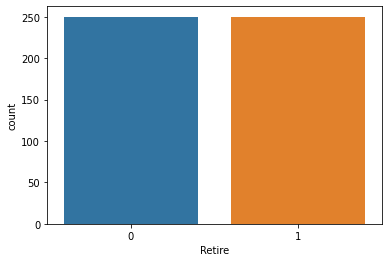

In [6]:
sns.countplot(bank_df['Retire'],label = 'Retirement')

**Model Training**

In [7]:
bank_df = bank_df.drop(['Customer ID'], axis =1)
bank_df

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


**Now dropping the Retire column as it is not the input**

In [8]:
X =bank_df.drop(['Retire'], axis = 1)
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [9]:
y = bank_df['Retire']
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [10]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train, y_test =train_test_split(X,y, test_size= 0.2, random_state= 5)


**Evaluating the model**

In [11]:
from sklearn.svm import SVC
from sklearn.metrics  import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

In [12]:
y_predict =svc_model.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



<AxesSubplot:>

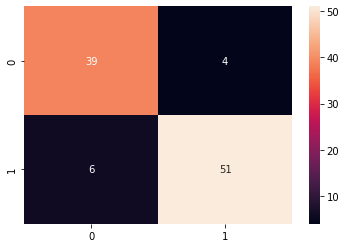

In [13]:
y_predict= svc_model.predict(X_test)
y_predict
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)

**Accuracy is about 90%**

In [14]:
import sklearn
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
accuracy

0.9